C:\Users\Adam\AppData\Local\Temp\ipykernel_6716\977850643.py:109: RuntimeWarning: divide by zero encountered in log10
  W = 20 * np.log10(W) #get level in dB #get appropriate digital frequencies


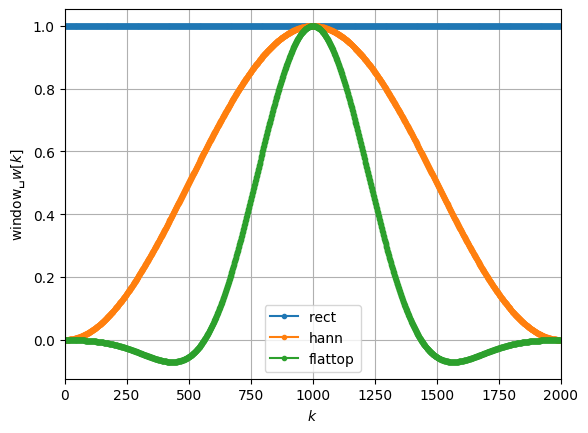

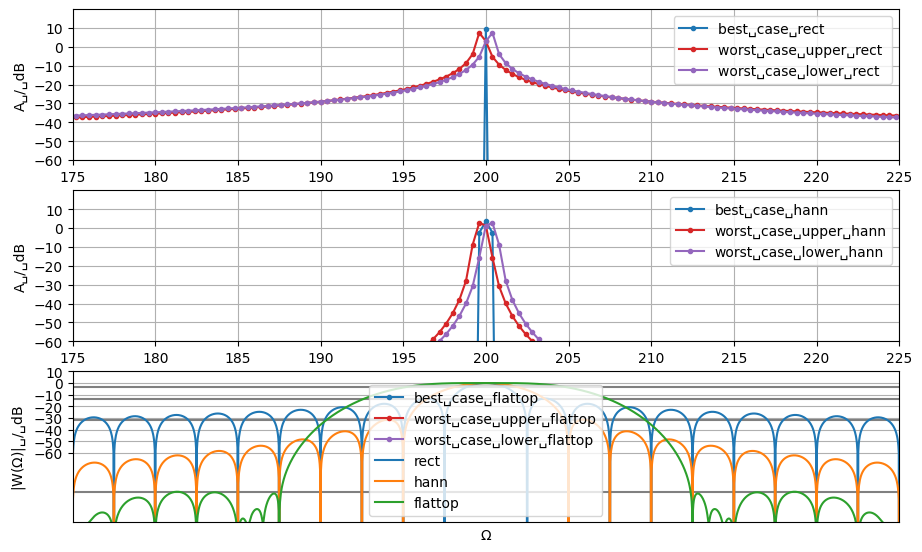

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, ifft, fftshift
#from scipy. fft import fft , ifft , fftshift 
from scipy.signal.windows import hann, flattop

# Generating signals 
#Variant 6
f1 = 600  # Hz
f2 = 600.25  # Hz
f3 = 599.75  # Hz
#|x[k]|max = 3
fs = 800 #Hz
N = 2000


amplitude = 3
k = np.arange(N)
x1 = amplitude * np.sin(2*np.pi*f1/fs*k)
x2 = amplitude * np.sin(2*np.pi*f2/fs*k)
x3 = amplitude * np.sin(2*np.pi*f3/fs*k)

#Generating Windows
wrect =np.ones(N) 
whann=hann(N, sym=False) 
wflattop= flattop(N, sym=False) 
plt.plot(wrect , "C0o-" , ms=3, label="rect ") 
plt.plot(whann, "C1o-" , ms=3, label="hann") 
plt.plot(wflattop, "C2o-" , ms=3, label="flattop") 
plt.xlabel(r"$k$") 
plt.ylabel(r"window␣$w[k]$") 
plt.xlim(0, N) 
plt.legend() 
plt.grid(True)

#DFT spectra uding FFT algorithm
X1wrect = fft(x1) 
X2wrect = fft(x2)
X3wrect = fft(x3)
X1whann= fft(x1 * whann) 
X2whann= fft(x2 * whann) 
X3whann= fft(x3 * whann) 
X1wflattop= fft(x1 * wflattop) 
X2wflattop= fft(x2 * wflattop)
X3wflattop= fft(x3 * wflattop)

# this handling is working for N even and odd: 
def fft2db(X): 
    N=X.size 
    Xtmp=2/N * X # independent of N, norm for sine amplitudes 
    Xtmp[0] *= 1/2 #bin for f=0Hz is existing only once, #so cancel ∗2 from above 
    if N%2==0: # fs/2 is included as a bin # fs/2 bin is existing only once, so cancel ∗2 from above 
        Xtmp[N//2] =Xtmp[N//2] / 2 
        return 20 * np.log10(np.abs(Xtmp)) # in dB 
        
# setup of frequency vector this way is independent of N even/odd: 
df = fs/N 
f =np.arange(N) * df

#Solution
plt.figure(figsize=(16/1.5, 10/1.5)) 
plt.subplot(3, 1, 1) 
plt.plot(f , fft2db(X1wrect), "C0o-" , ms=3, label="best␣case␣rect ") 
plt.plot(f , fft2db(X2wrect), "C3o-" , ms=3, label="worst␣case␣upper␣rect ") 
plt.plot(f , fft2db(X3wrect), "C4o-" , ms=3, label="worst␣case␣lower␣rect ") 
plt.xlim(175, 225) 
plt.ylim(-60, 20) 
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 20, 10)) 
plt.legend()
#plt.xlabel("f / Hz") 
plt.ylabel("A␣/␣dB") 
plt.grid(True) 

plt.subplot(3, 1, 2) 
plt.plot(f , fft2db(X1whann), "C0o-" , ms=3, label="best␣case␣hann") 
plt.plot(f , fft2db(X2whann), "C3o-" , ms=3, label="worst␣case␣upper␣hann")
plt.plot(f , fft2db(X3whann), "C4o-" , ms=3, label="worst␣case␣lower␣hann") 
plt.xlim(175, 225) 
plt.ylim(-60, 20) 
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 20, 10)) 
plt.legend() 
#plt.xlabel("f / Hz") 
plt.ylabel("A␣/␣dB") 
plt.grid(True) 

plt.subplot(3, 1, 3) 
plt.plot(f , fft2db(X1wflattop), "C0o-" , ms=3, label="best␣case␣flattop") 
plt.plot(f , fft2db(X2wflattop), "C3o-" , ms=3, label="worst␣case␣upper␣flattop") 
plt.plot(f , fft2db(X3wflattop), "C4o-" , ms=3, label="worst␣case␣lower␣flattop") 
plt.xlim(175, 225) 
plt.ylim(-60, 20) 
plt.xticks(np.arange(175, 230, 5)) 
plt.yticks(np.arange(-60, 20, 10)) 
plt.legend() 
plt.xlabel("f␣/␣Hz") 
plt.ylabel("A␣/␣dB") 
plt.grid(True)

#Preparations for solutions
def winDTFTdB(w): 
    N = w.size #get window length 
    Nz = 100 * N #zeropadding length 
    W = np.zeros(Nz) #allocate RAM 
    W[0:N] = w # insert window 
    W = np.abs(fftshift(fft(W))) # fft , fftshift and magnitude 
    W/=np.max(W) #normalize to maximum, i.e. the mainlobe #maximum here 
    W = 20 * np.log10(W) #get level in dB #get appropriate digital frequencies 
    Omega = 2 * np.pi/Nz * np.arange(Nz) - np.pi #also shifted 
    return Omega, W

plt.plot([-np.pi , +np.pi ] , [-3.01, -3.01], "gray")#mainlobe bandwidth 
plt.plot([-np.pi , +np.pi ] , [-13.3, -13.3], "gray")# rect max sidelobe 
plt.plot([-np.pi , +np.pi ] , [-31.5, -31.5], "gray")#hannmax sidelobe 
plt.plot([-np.pi , +np.pi ] , [-93.6, -93.6], "gray")# flattop max #sidelobe 


Omega, W = winDTFTdB(wrect) 
plt.plot(Omega, W, label="rect") 

Omega,W = winDTFTdB(whann) 
plt.plot(Omega,W, label="hann") 

Omega,W = winDTFTdB(wflattop) 
plt.plot(Omega,W, label="flattop") 

plt.xlim(-np.pi , np.pi) 
plt.ylim(-120, 10) 
plt.xlim(-np.pi/100, np.pi/100) #zoom into mainlobe 
plt.xlabel(r"$\Omega$") 
plt.ylabel(r"|W($\Omega$)|␣/␣dB") 
plt.legend() 
plt.grid(True)
